In this notebook, we show the role that an embedding network can play when it comes to clustering of speech utterances. We first visualize 2D projections of average mfcc vectors, one 59 dimensional with the first and second derivatives and the other 16 dimensional without derivatives. Then, we show how the large-scale embedding network and the mobile version of the architecture deal with embedding of those feature vectors.

The large neural network (trained in pytorch) embeds the 59 dimensional feature vectors into a 128 dimensional space. The mobile architecture (trained in tensorflow) takes in 16 dimensional feature vector and embeds it into 32 dimensional space.

# t-SNE visualization of MFCC features

### 59 dimensional feature vector, 19 coefficients with the first and second derivatives

#### Compute features

In [3]:
from pydub import AudioSegment
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
import torch
import os
import numpy as np
from own_library.utils import utils
from own_library.models import TristouNet

samples_per_speaker = 50
path = "/home/piotr/Coding/speaker-embedding/tsne_vis"
embeddings = {}
targets = []
for i, speaker in enumerate(os.listdir(path)):
    audio = AudioSegment.from_wav(os.path.join(path, speaker))
    feature_batch = utils.batch_builder(audio, model="pytorch", seq_len=2,
                                        num_seq=samples_per_speaker, normalize=False)
    feature_batch = np.average(feature_batch, axis=1)
    y = [i for j in range(samples_per_speaker)]
    if i == 0:
        features = feature_batch
    else:
        features = np.concatenate((features, feature_batch), axis=0)
                                    
    targets.extend(y)

print(features.shape)
print(len(targets))

(500, 59)
500


#### Visualize

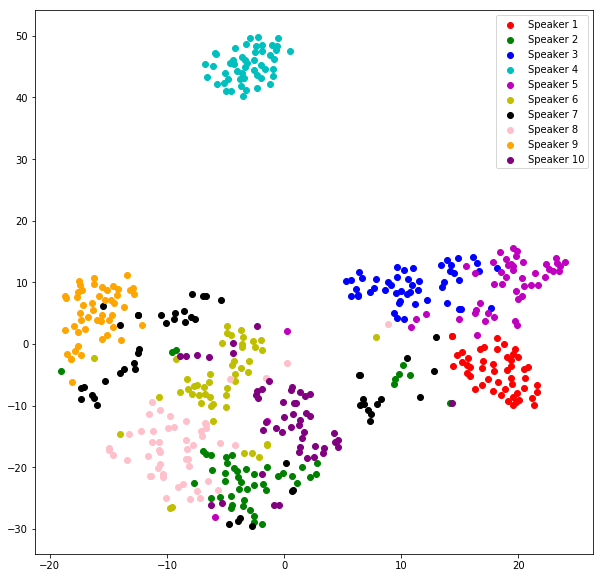

In [8]:
X = features
y = np.asarray(targets)

tsne = TSNE(n_components=2, random_state=0, perplexity=30)
X_projected = tsne.fit_transform(X)

target_names = ["Speaker 1" ,"Speaker 2", "Speaker 3", "Speaker 4",
                "Speaker 5","Speaker 6","Speaker 7", "Speaker 8",
                "Speaker 9", "Speaker 10"]
target_ids = range(len(target_names))


plt.figure(figsize=(10, 10))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'pink', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_projected[y == i, 0], X_projected[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

### 16 dimensional feature vector, 16 coefficients


#### Compute features

In [1]:
from pydub import AudioSegment
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
import torch
import os
import numpy as np
from own_library.utils import utils
from own_library.models import TristouNet

samples_per_speaker = 50
path = "/home/piotr/Coding/speaker-embedding/tsne_vis"
embeddings = {}
targets = []
for i, speaker in enumerate(os.listdir(path)):
    audio = AudioSegment.from_wav(os.path.join(path, speaker))
    feature_batch = utils.batch_builder(audio, model="tensorflow", seq_len=2,
                                        num_seq=samples_per_speaker, normalize=False, tf_reshape=False)
    feature_batch = np.average(feature_batch, axis=1)
    y = [i for j in range(samples_per_speaker)]
    if i == 0:
        features = feature_batch
    else:
        features = np.concatenate((features, feature_batch), axis=0)
                                    
    targets.extend(y)

print(features.shape)
print(len(targets))

/home/piotr/anaconda3/envs/pyannote/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(500, 16)
500


#### Visualize

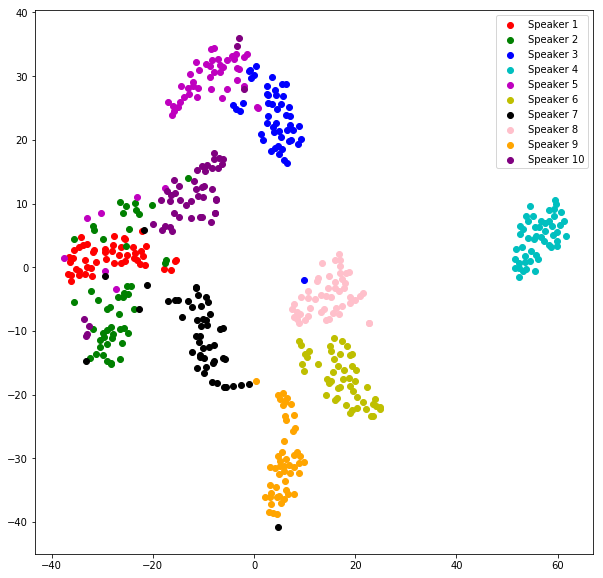

In [2]:
X = features
y = np.asarray(targets)

tsne = TSNE(n_components=2, random_state=0, perplexity=20)
X_projected = tsne.fit_transform(X)

target_names = ["Speaker 1" ,"Speaker 2", "Speaker 3", "Speaker 4", "Speaker 5",
                "Speaker 6","Speaker 7", "Speaker 8", "Speaker 9", "Speaker 10"]
target_ids = range(len(target_names))


plt.figure(figsize=(10, 10))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'pink', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_projected[y == i, 0], X_projected[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

# t-SNE 2D visualization of embedding vectors computed by the large-scale neural network

Input: 59 dim mfcc vector
Output: 128 dim embedding

#### Compute embeddings

In [1]:
from pydub import AudioSegment
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE
import torch
import os
import numpy as np
from own_library.utils import utils
from own_library.models import TristouNet

samples_per_speaker = 50
path = "/home/piotr/Coding/speaker-embedding/tsne_vis"
embeddings = {}
targets = []
for i, speaker in enumerate(os.listdir(path)):
    audio = AudioSegment.from_wav(os.path.join(path, speaker))
    feature_batch = utils.batch_builder(audio, model="pytorch", seq_len=2,
                                        num_seq=samples_per_speaker, normalize=True)
    emb_vectors = utils.build_embedding(feature_batch,"pytorch", average=False)
    y = [i for j in range(samples_per_speaker)]
    if i == 0:
        embeddings = emb_vectors 
    else:
        embeddings = np.concatenate((embeddings, emb_vectors), axis=0)
                                    
    targets.extend(y)
print(embeddings.shape)
print(len(targets))

/home/piotr/anaconda3/envs/pyannote/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


(500, 128)
500


#### Visualize

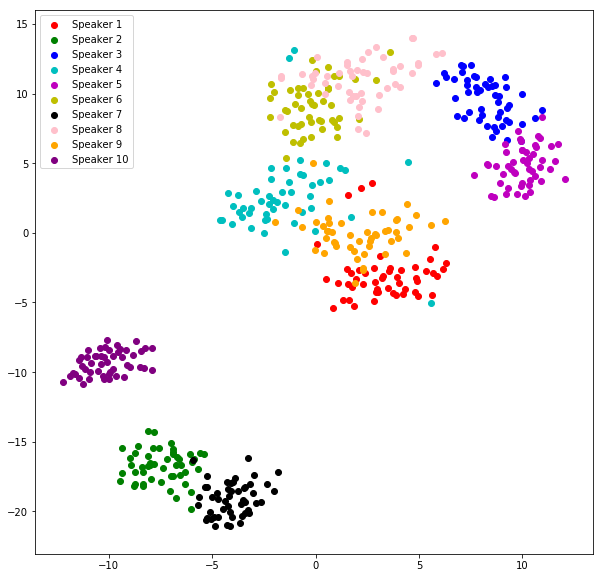

In [6]:
X = embeddings
y = np.asarray(targets)

tsne = TSNE(n_components=2, random_state=0, perplexity=60)
X_projected = tsne.fit_transform(embeddings)

target_names = ["Speaker 1" ,"Speaker 2", "Speaker 3", "Speaker 4", "Speaker 5", 
                "Speaker 6","Speaker 7", "Speaker 8", "Speaker 9", "Speaker 10"]
target_ids = range(len(target_names))


plt.figure(figsize=(10, 10))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'pink', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_projected[y == i, 0], X_projected[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

# t-SNE 2D visualization of embedding vectors computed by the mobile neural network

Input: 16 dim feature vector
Output: 32 dim embedding vector

#### Compute embeddings

In [5]:
import numpy as np
from sklearn.manifold import TSNE
import os
from own_library.utils import utils
from pydub import AudioSegment
from matplotlib import pyplot as plt
from own_library.models import TristouNet
import torch

samples_per_speaker = 50
path = "/home/piotr/Coding/speaker-embedding/tsne_vis"
embeddings = {}
targets = []
for i, speaker in enumerate(os.listdir(path)):
    audio = AudioSegment.from_wav(os.path.join(path, speaker))
    feature_batch = utils.batch_builder(audio, model="tensorflow", seq_len=3.58,
                                        num_seq=samples_per_speaker, normalize=False, tf_reshape=True)
    emb_vectors = utils.build_embedding(feature_batch, "tensorflow", average=False)
    y = [i for j in range(samples_per_speaker)]
    if i == 0:
        embeddings = emb_vectors 
    else:
        embeddings = np.concatenate((embeddings, emb_vectors), axis=0)
                                    
    targets.extend(y)
print(embeddings.shape)
print(len(targets))

(500, 32)
500


#### Visualize

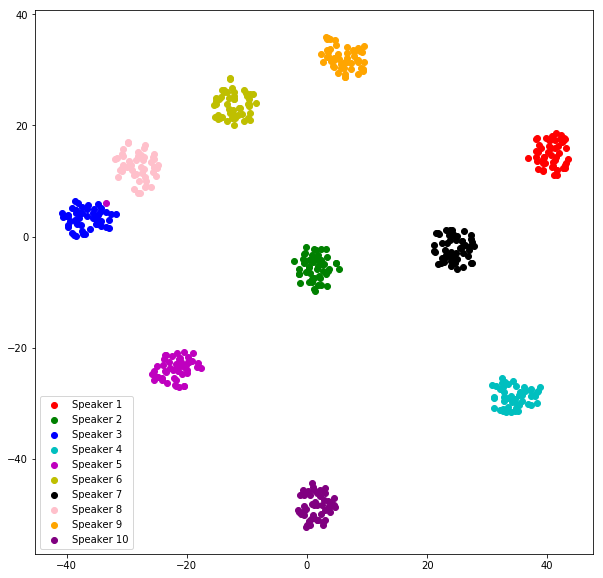

In [6]:
X = embeddings
y = np.asarray(targets)

tsne = TSNE(n_components=2, random_state=0, perplexity=20)
X_projected = tsne.fit_transform(X)
target_names = ["Speaker 1" ,"Speaker 2", "Speaker 3", "Speaker 4", "Speaker 5",
                "Speaker 6","Speaker 7", "Speaker 8", "Speaker 9", "Speaker 10"]
target_ids = range(len(target_names))

plt.figure(figsize=(10, 10))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'pink', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, target_names):
    plt.scatter(X_projected[y == i, 0], X_projected[y == i, 1], c=c, label=label)
plt.legend()
plt.show()